In [1]:
%cd ..

/home/jairo/Documentos/GitHub/parallel-kink-scattering


/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from modules.numeric import *

In [79]:
phi4 = Phi4()
N = 1024
L = 40

def y0(x):
    return np.stack((
        np.exp(-1*x**2),
        np.zeros(x.shape)
    ))

In [80]:
DT = 5e-2

collider = Collider(
    x_lattice= (-L, L, N), 
    dt= DT, 
    order= 4,
    y0= y0,
    pot_diff= lambda y: 0,
    boundaries= ('dirichlet', 'dirichlet'),
    integrator='rk4',
)
collider.rb.param = collider.lb.param = 0

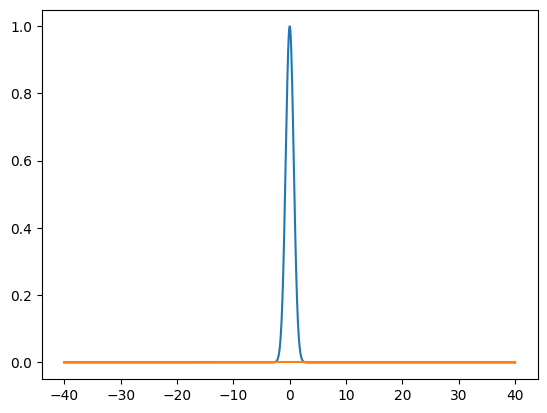

In [81]:
plt.plot(collider.x, y0(collider.x).T)

In [85]:
lat, Y = collider.run(200)

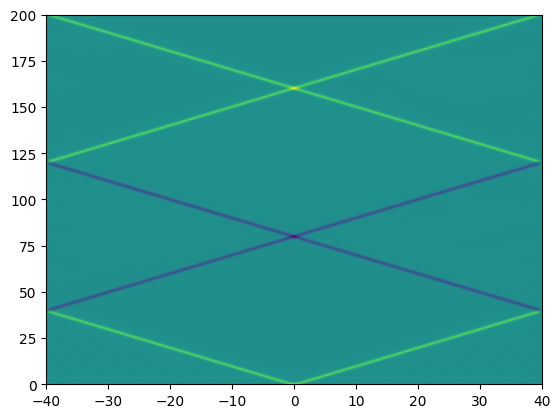

In [86]:
plt.imshow(Y[10:, 0], aspect='auto', extent=lat.extent(), origin='lower', vmin=-1, vmax=1)

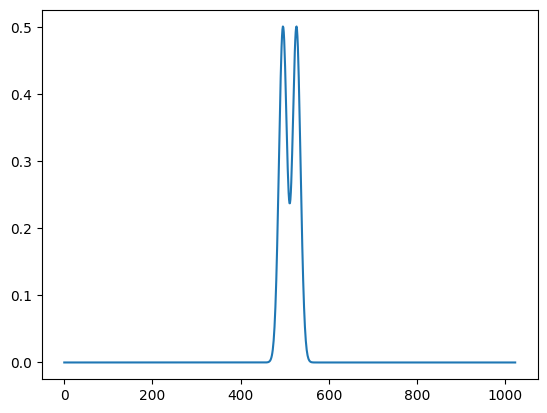

In [84]:
plt.plot(Y[24, 0])